## Importing Data and Libraries

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
import seaborn as sns

In [21]:
df=pd.read_csv('online_shoppers_intention.csv', sep=',') #importing the data set 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [22]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

#### Data set cleaning 

In [23]:
# Check and handle duplicates
print(f"Total rows before cleaning: {len(df)}")
duplicates_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates_count}")

if duplicates_count > 0:
    df = df.drop_duplicates()
    print(f"Total rows after removing duplicates: {len(df)}")

Total rows before cleaning: 12330
Duplicate rows found: 125
Total rows after removing duplicates: 12205


## Exploratory Data Analysis

#### Summary statistics for numerical and categorical features

In [24]:
print("Summary Statistics (Numerical):")
print(df.describe())
print("Summary Statistics (Categorical):")
print(df.describe(include='object'))

Summary Statistics (Numerical):
       Administrative  Administrative_Duration  Informational  \
count    12205.000000             12205.000000   12205.000000   
mean         2.338878                81.646331       0.508726   
std          3.330436               177.491845       1.275617   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.000000       0.000000   
75%          4.000000                94.700000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12205.000000    12205.000000             12205.000000   
mean                34.825454       32.045637              1206.982457   
std                141.424807       44.593649              1919.601400   
min                  0.000000        0.000000                 0.000000   
25%         

#### Distribution of Administrative Page Visits

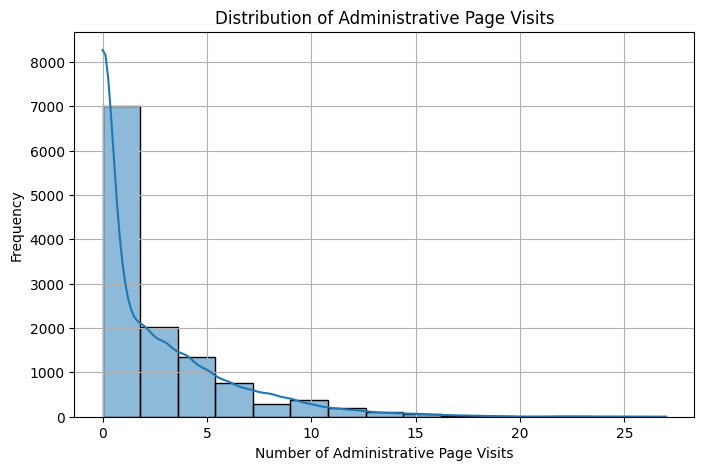

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Administrative'], bins=15, kde=True)
plt.title('Distribution of Administrative Page Visits')
plt.xlabel('Number of Administrative Page Visits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram displays the distribution of Administrative Page Visits, ( the number of pages a user viewed that are categorized as administrative (e.g., policy pages, FAQs, account settings, etc.)). The majority of sessions include very few or no administrative page views, with a sharp drop-off as the number increases. This right-skewed distribution suggests that users typically do not spend much time navigating administrative content during their sessions, most likely focusing on informational or product-related pages instead.

#### Revenue by Month (Seasonality Pattern)

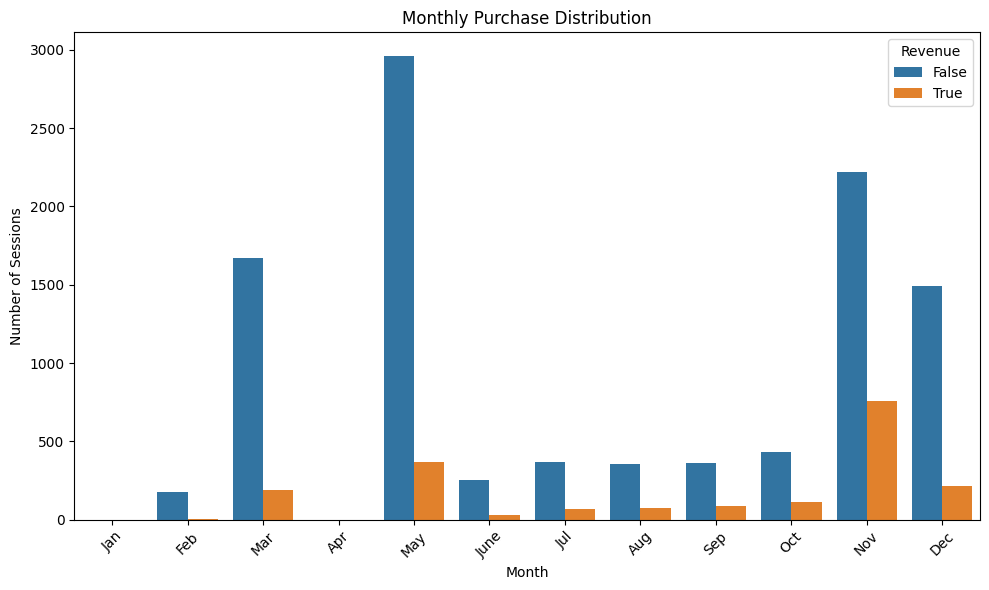

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Revenue', order=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Purchase Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.legend(title='Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This bar chart shows the number of user sessions across each month, split by whether the session resulted in revenue. While overall session counts vary month to month, months like May and November show relatively high volumes of both traffic and purchases. November stands out for having a high proportion of sessions that resulted in revenue (the most out of all months), likely influenced by seasonal sales such as Black Friday. 

#### Demographic Comparison of VisitorType (Returning, New, or Other)

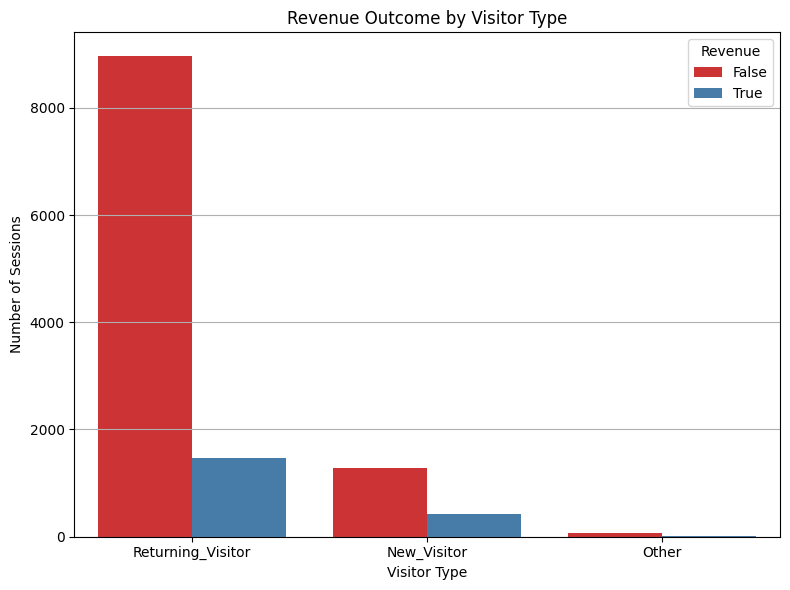

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='VisitorType', hue='Revenue', palette='Set1')
plt.title('Revenue Outcome by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Number of Sessions')
plt.legend(title='Revenue')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This bar chart compares the number of sessions by VisitorType (Returning, New, or Other) and whether those sessions resulted in revenue. Returning Visitors not only account for the majority of sessions overall, but they also make up the largest share of purchasing sessions. While New Visitors convert less frequently despite a moderate session count, and Other Visitors contribute very minimally. This suggests that users with previous experience on the site are more likely to make purchases, reinforcing the importance of customer retention and return traffic.

#### Bounce Rate vs. Exit Rate (by Revenue)
**Bounce rate** is the percentage of sessions where the user leaves the site after viewing only one page and the **exit rate** is the percentage of pageviews that were the last page in a session

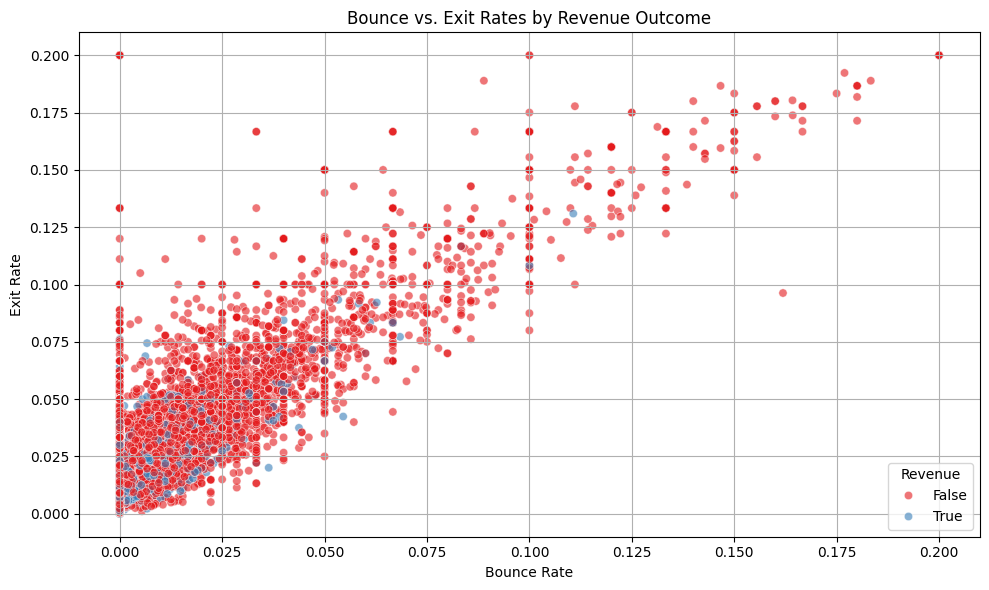

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BounceRates', y='ExitRates', hue='Revenue', alpha=0.6, palette='Set1')
plt.title('Bounce vs. Exit Rates by Revenue Outcome')
plt.xlabel('Bounce Rate')
plt.ylabel('Exit Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot compares BounceRate and ExitRate across sessions, with sessions that resulted in revenue in blue and sessions that did not in red. Both metrics reflect how and when users leave the site: bounce rate measures users who left after viewing only one page, while exit rate is those who left on any final page. The chart shows a positive relationship between the two metrics, especially among non-purchasing sessions.

#### Total Time Spent on Site by Revenue Outcome

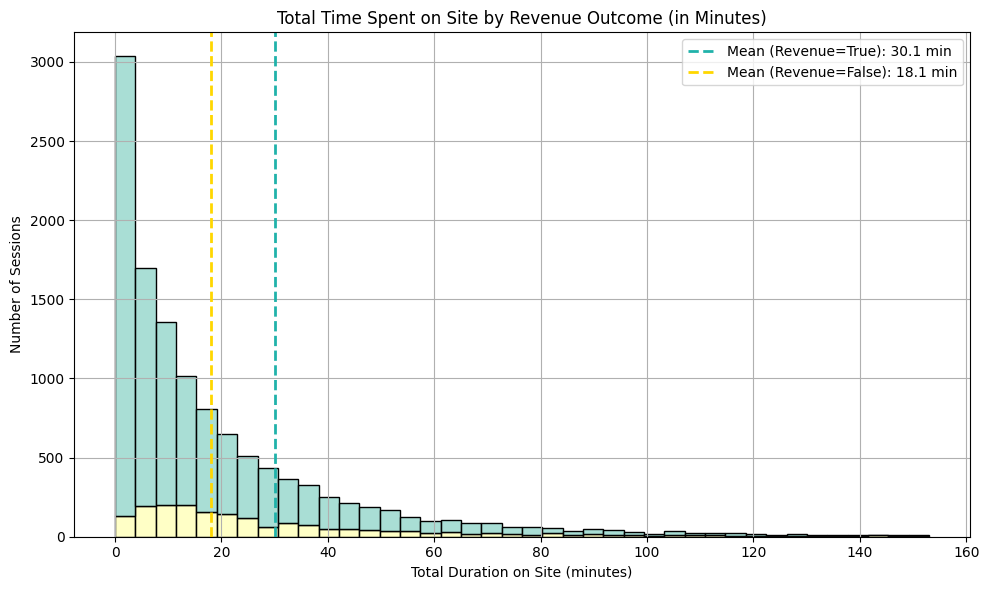

In [29]:
# Find total duration and convert to minutes
df['TotalDuration_Minutes'] = (
    df['Administrative_Duration'] +
    df['Informational_Duration'] +
    df['ProductRelated_Duration']
) / 60  # Convert seconds to minutes

# Filter out top 1% to reduce outliers
df_filtered = df[df['TotalDuration_Minutes'] < df['TotalDuration_Minutes'].quantile(0.99)]

# find mean duration (in minutes) for each revenue group
mean_true = df_filtered[df_filtered['Revenue'] == True]['TotalDuration_Minutes'].mean()
mean_false = df_filtered[df_filtered['Revenue'] == False]['TotalDuration_Minutes'].mean()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='TotalDuration_Minutes', hue='Revenue', multiple='stack', bins=40, palette='Set3')

# Mean lines
plt.axvline(mean_true, color='lightseagreen', linestyle='--', linewidth=2, label=f'Mean (Revenue=True): {mean_true:.1f} min')
plt.axvline(mean_false, color='gold', linestyle='--', linewidth=2, label=f'Mean (Revenue=False): {mean_false:.1f} min')

# Labels and legend
plt.title('Total Time Spent on Site by Revenue Outcome (in Minutes)')
plt.xlabel('Total Duration on Site (minutes)')
plt.ylabel('Number of Sessions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This histogram shows how long users spent on the site, measured in minutes. The vertical dashed lines represent the average time spent by each group. On average, users who made purchases spent significantly more time on the site compared to those who did not. This shows the link between longer engagement and conversion likelihood.

#### Combination of Weekend and Revenue 

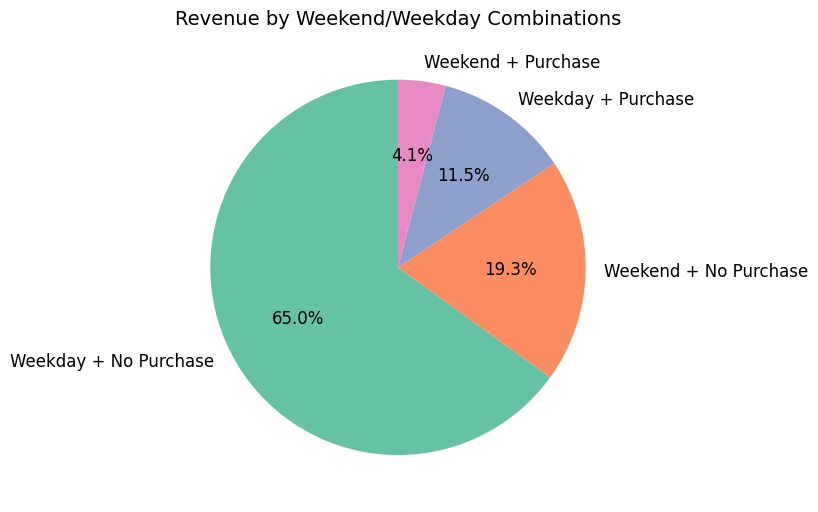

In [30]:
#new column with labeled combinations
df['Weekend_Revenue_Label'] = df.apply(
    lambda row: (
        "Weekend + Purchase" if row['Weekend'] and row['Revenue'] else
        "Weekend + No Purchase" if row['Weekend'] and not row['Revenue'] else
        "Weekday + Purchase" if not row['Weekend'] and row['Revenue'] else
        "Weekday + No Purchase"
    ),
    axis=1
)

# Count category combinations
combo_counts = df['Weekend_Revenue_Label'].value_counts()
colors = sns.color_palette("Set2")

# Plot the pie chart
plt.figure(figsize=(8, 8))
combo_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('Revenue by Weekend/Weekday Combinations', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()


This pie chart breaks down sessions based on whether they occurred on a weekend or weekday and whether they resulted in revenue. The largest segment Weekday and No Purchase accounts for 65% of all sessions, showing that most users browse during the week without purchasing. While purchases happen on both weekdays and weekends, weekday purchases (11.5%) clearly outpace weekend purchases (4.1%), suggesting that users may be more likely to complete purchases during the week.

#### Correlation Heatmap

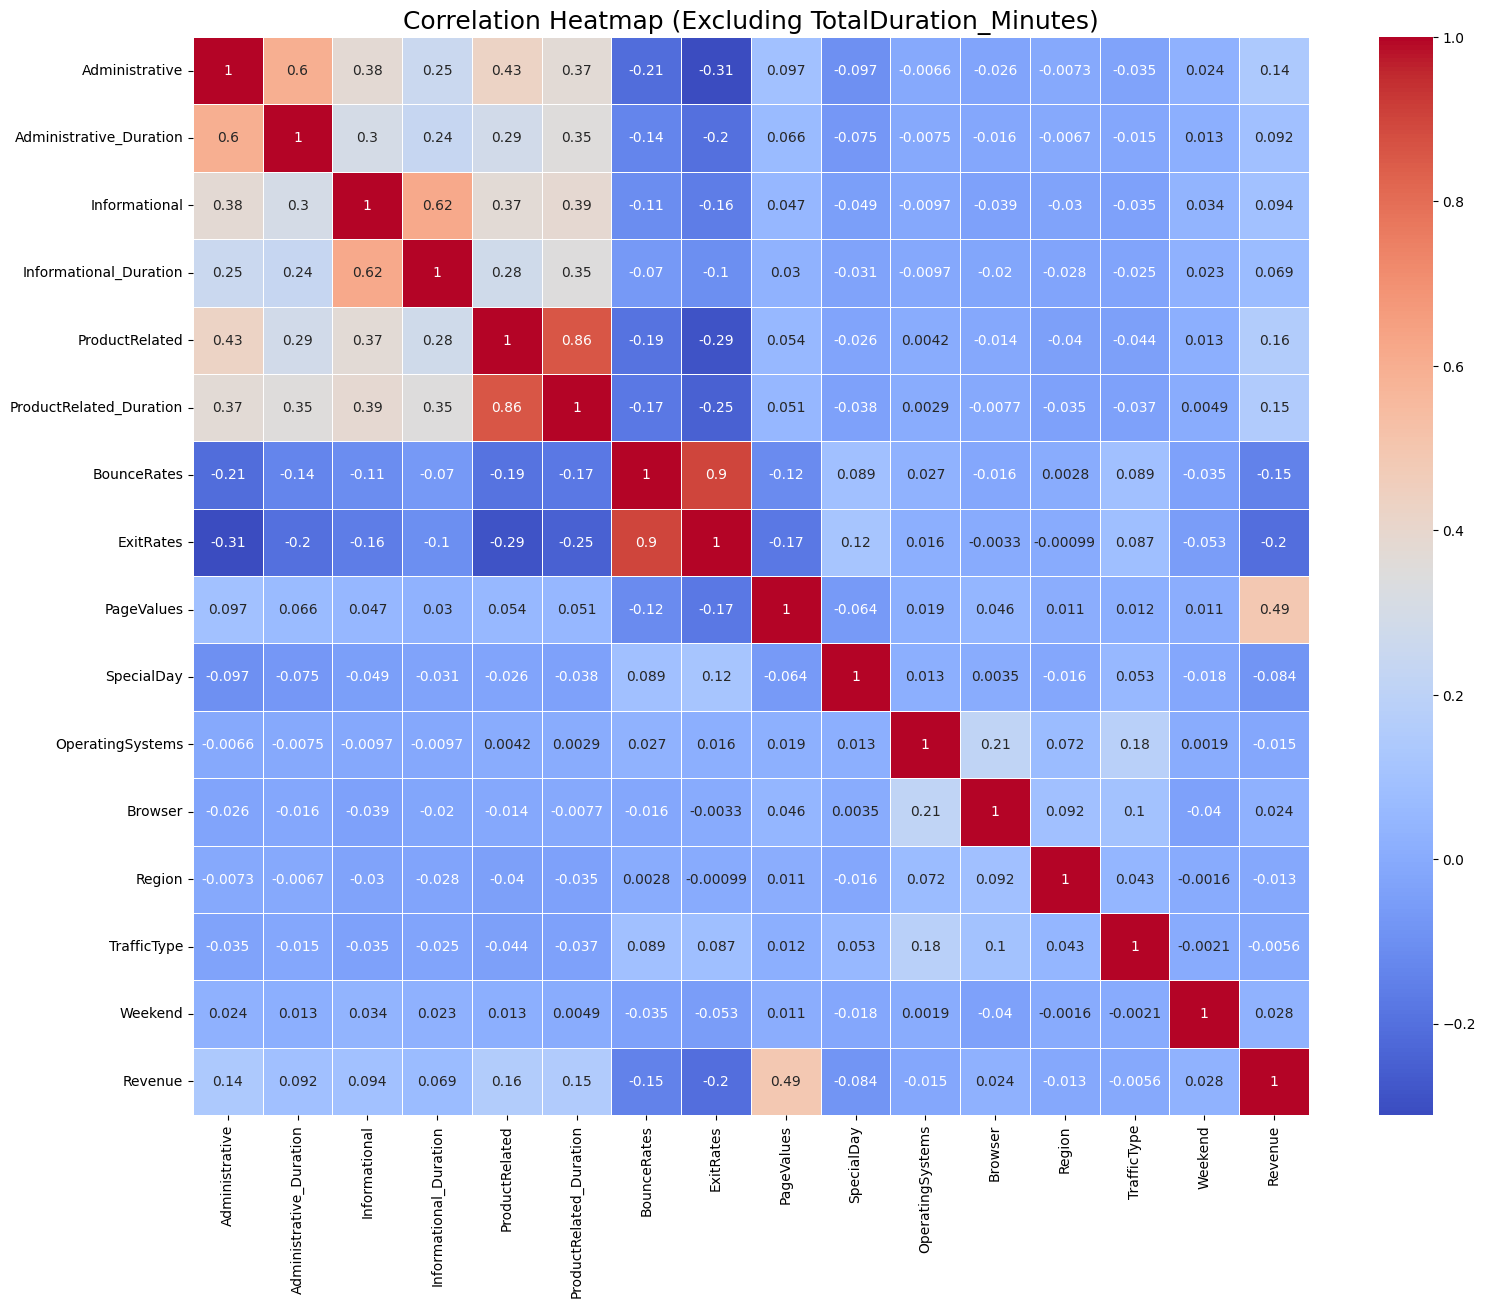

In [31]:
# Copy the dataframe
df_encoded = df.copy()

# Convert boolean columns to integers
df_encoded['Weekend'] = df_encoded['Weekend'].astype(int)
df_encoded['Revenue'] = df_encoded['Revenue'].astype(int)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['Month', 'VisitorType'], drop_first=True)

# Drop 'TotalDuration_Minutes'
if 'TotalDuration_Minutes' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['TotalDuration_Minutes'])

# Select only numeric columns
numeric_encoded_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Create the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(numeric_encoded_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Excluding TotalDuration_Minutes)", fontsize=18)
plt.show()


In [32]:
#absolute correlation matrix
corr_matrix = numeric_encoded_df.corr().abs()
corr_unstacked = corr_matrix.unstack()

#Remove self-correlations
corr_unstacked = corr_unstacked[corr_unstacked < 1.0]

#Drop symmetric duplicates
corr_unique = corr_unstacked.drop_duplicates()

# Drop 'TotalDuration_Minutes' 
if 'TotalDuration_Minutes' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['TotalDuration_Minutes'])

#Filter out "near-self" correlations based on common prefix(ex: "ProductRelated" and "ProductRelated_Duration")
def is_near_self(pair):
    var1, var2 = pair
    # Simplify to core name 
    base1 = var1.split('_')[0].replace('Duration', '')
    base2 = var2.split('_')[0].replace('Duration', '')
    return base1 == base2

filtered_corr = corr_unique[~corr_unique.index.to_series().apply(is_near_self)]

#top 5 strongest filtered correlations
top5_filtered_corr = filtered_corr.sort_values(ascending=False).head(5)

print("Top 5 Correlations (Filtered):")
print(top5_filtered_corr)

Top 5 Correlations (Filtered):
BounceRates     ExitRates                  0.902144
PageValues      Revenue                    0.491894
Administrative  ProductRelated             0.428305
Informational   ProductRelated_Duration    0.386052
Administrative  Informational              0.375256
dtype: float64


The correlation heatmap gives an overview of how numeric features in the dataset relate to one another. It highlights strong relationships such as the one between BounceRates and ExitRates (0.90), and between ProductRelated and ProductRelated_Duration (0.86), which make sense due to their direct connection in user behavior. Additionally, PageValues and Revenue show a moderately strong positive correlation (0.49), suggesting that sessions with higher-valued interactions are more likely to convert. However, many of the top correlations in the heatmap involve variables that are essentially two versions of the same metric (e.g., duration vs. count). To uncover more meaningful and non-redundant relationships, a filtered correlation analysis was performed by removing self-correlations and those with similar feature names. This refined analysis confirmed BounceRates and ExitRates as the strongest pair (0.90), but also surfaced valuable patterns such as the correlation between Administrative and ProductRelated visits (0.43), and between Informational and ProductRelated_Duration (0.39). These findings offer deeper behavioral insights and support the idea that various forms of user engagement tend to be interlinked—and that high PageValues is a strong indicator of revenue generation.

## Hypothesis Formulation
**Hypothesis One** :  
Returning Visitors are more likely to generate revenue than New Visitors.  
  
**Hypothesis Two**:  
Higher PageValues are associated with increased likelihood of Revenue.



## Hypothesis Testing

**Hypothesis 1:**  
Returning Visitors are more likely to generate revenue than New Visitors.

**Null Hypothesis (H₀)**:   
There is no association between VisitorType and Revenue.  
**Alternative Hypothesis (H₁)**:   
Returning Visitors are significantly more likely to convert than New Visitors.  

**Test:**  
Use a Chi-square test of independence since both variables are categorical. 

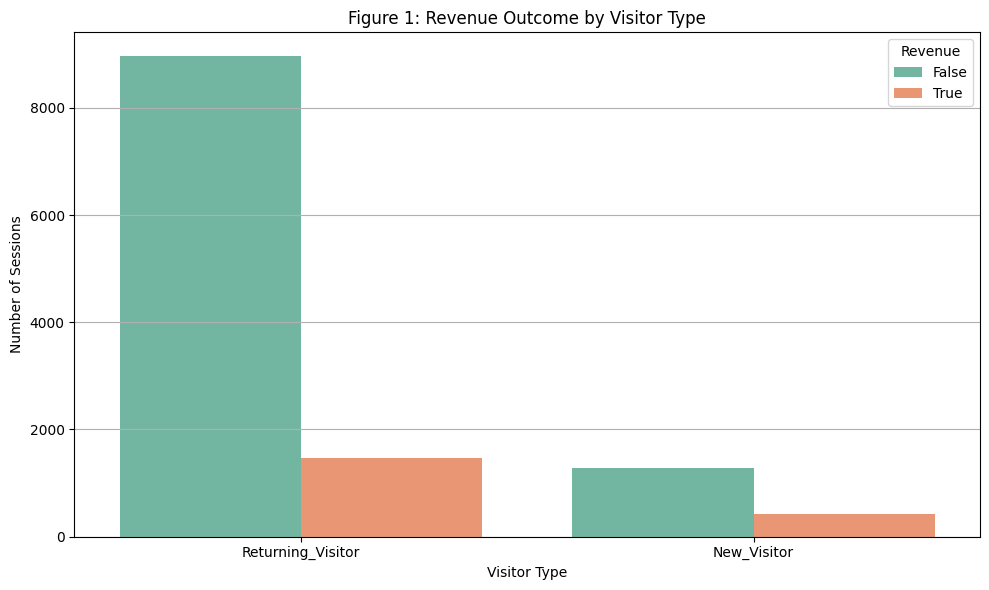

In [33]:
# Filter to only include Returning and New Visitors
df_visitors = df[df['VisitorType'].isin(['Returning_Visitor', 'New_Visitor'])]

# Revenue outcome by Visitor Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_visitors, x='VisitorType', hue='Revenue', palette='Set2')
plt.title('Figure 1: Revenue Outcome by Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Number of Sessions')
plt.legend(title='Revenue')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [34]:
# Chi-square Test: VisitorType vs Revenue
contingency_table = pd.crosstab(df_visitors['VisitorType'], df_visitors['Revenue'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test Results")
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)


Chi-square Test Results
Chi-square Statistic: 128.98311093201377
Degrees of Freedom: 1
p-value: 6.839790501401443e-30


**Hypotheses 1:**   
Null Hypothesis (H₀): There is no relationship between VisitorType and Revenue.

 Meaning that: 
* Returning and New Visitors are equally likely to result in a purchase.

* Revenue is independent of VisitorType.

Alternative Hypothesis (H₁): Returning Visitors are more likely to result in revenue than New Visitors.
 Meaning that: 
* Returning Visitors have a higher likelihood of completing a purchase.

* There is a statistically significant association between VisitorType and Revenue.

#### Results  
From the Bar Plot:

Figure 1 shows that Returning Visitors account for a much larger proportion of purchases compared to New Visitors. The difference in revenue outcomes by visitor type supports the claim that Returning Visitors are more engaged.

**Chi-square Test Statistic: 128.98**

This statistic measures how much the observed visitor–revenue relationship differs from what we’d expect under independence.

**Chi-square p-value: $6.84 \times 10^{-30}$**

This p-value is far smaller than the standard alpha level of 0.05, indicating evidence to reject the null hypothesis.

The probability of observing such a strong relationship by chance is virtually zero.

#### Hypothesis 1 Conclusion
Based on both the bar plot and the results of the Chi-square test:

There is strong **statistical evidence of a relationship** between VisitorType and Revenue.

Returning Visitors are significantly more likely to generate revenue compared to New Visitors.

The results support the alternative hypothesis (H₁) and suggest that prior engagement with the website is a meaningful predictor of conversion.

#### **Hypothesis 2:**  

**Null Hypothesis (H₀)**:   
The average PageValues is the same whether or not revenue was generated.  

**Alternative Hypothesis (H₁)**:   
Sessions that lead to revenue have significantly higher PageValues.

* PageValue is a metric that estimates the average value of a page a user visited before completing a purchase or conversion, showing how much that page contributed to revenue.

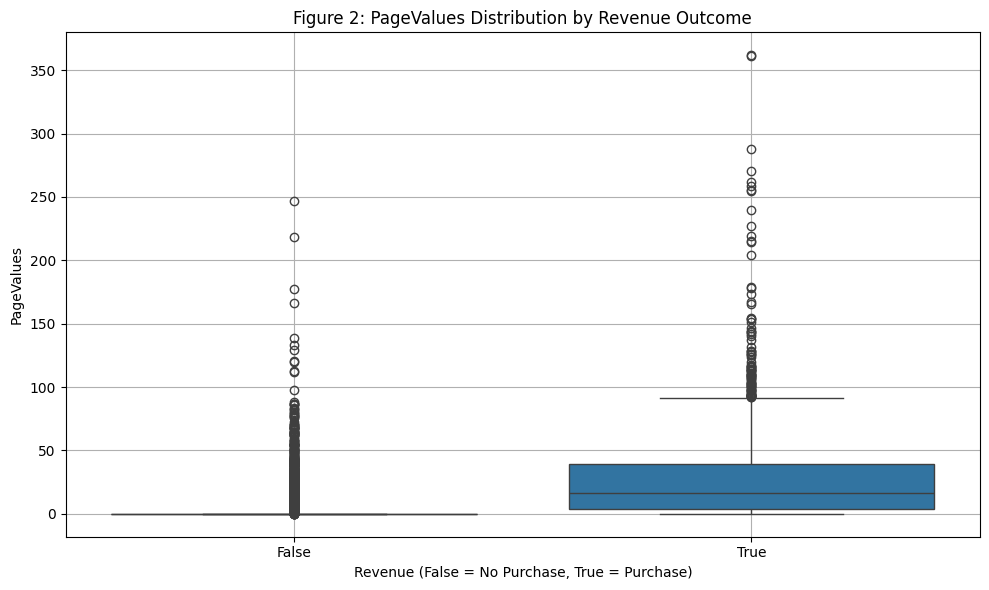

In [35]:
# Plot PageValues distribution grouped by Revenue outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Revenue', y='PageValues')
plt.title('Figure 2: PageValues Distribution by Revenue Outcome')
plt.xlabel('Revenue (False = No Purchase, True = Purchase)')
plt.ylabel('PageValues')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Grouped data for t-test
revenue_yes = df[df['Revenue'] == True]['PageValues']
revenue_no = df[df['Revenue'] == False]['PageValues']

# Welch’s t-test since there is unequal variance
t_stat, p_value = ttest_ind(revenue_yes, revenue_no, equal_var=False)

print("T-test Results")
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-test Results
T-statistic: 31.16511626801698
p-value: 1.8778523922191217e-173


### **Hypothesis 2:**  
**Null Hypothesis (H₀):** There is no difference in average PageValues between sessions that generate revenue and those that do not.

Meaning that:  
* The average PageValues for Revenue = True is equal to that for Revenue = False.

**Alternative Hypothesis (H₁):** Sessions that lead to revenue have significantly higher PageValues.

Meaning that:  
* The average PageValues is greater for sessions where revenue is generated.

#### **Results**  
From the Box Plot:

Figure 2 reveals a clear upward shift in PageValues for sessions with revenue, showing that converting sessions typically engage more with product-related content or valuable pages.

**T-test Statistic: 31.17**  
This large t-value reflects a strong separation between the mean PageValues of the two groups.

**T-test p-value: $1.88 \times 10^{-173}$**  
This p-value is effectively zero and well below any standard significance threshold (e.g., 0.05).  
It provides extremely strong evidence that the difference in means is not due to random chance.

#### **Hypothesis 2 Conclusion**

Based on the results of the t-test and the distribution visual:

There is a **statistically significant difference in PageValues** between sessions that convert and those that don’t.

Sessions that result in revenue have **substantially higher PageValues** on average.

The data **supports the alternative hypothesis (H₁)**, confirming that PageValues is a strong indicator of purchase behavior.


## Machine Learning

### Feature Importance with Random Forest

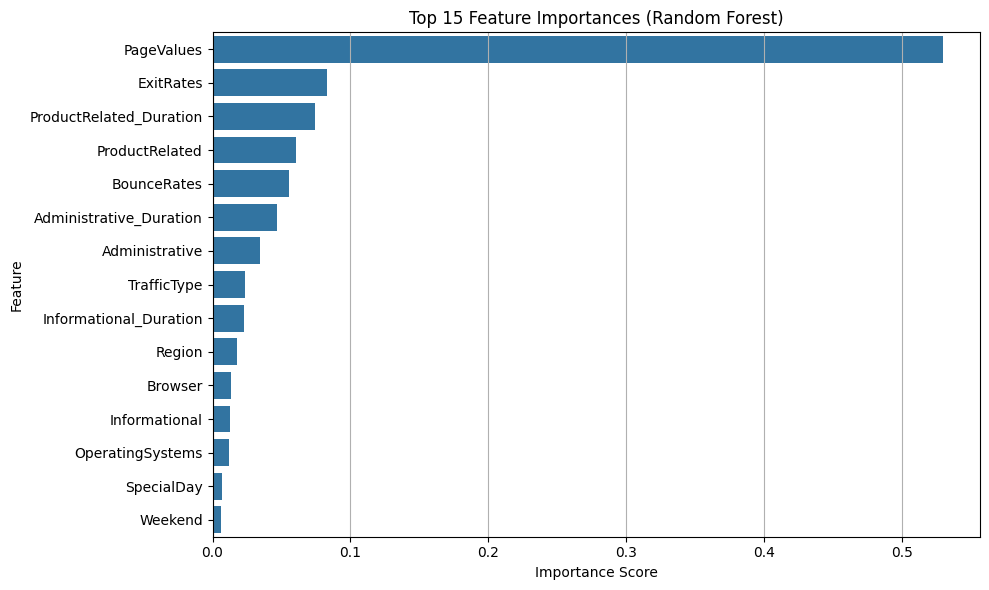

In [37]:
# Define features x and target y
X = numeric_encoded_df.drop(columns=['Revenue'])
y = numeric_encoded_df['Revenue']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)
#Build and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

#Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

#top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', hue=None, legend=False)
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()


## Summary of Conclusions
##### Hypothesis Test 1: Relationship Between Visitor Type and Revenue
**Conclusion:**   
There is a statistically significant relationship between VisitorType and Revenue. Returning Visitors are substantially more likely to generate revenue compared to New Visitors. The results of the Chi-square test provide strong evidence against the null hypothesis (H₀), supporting the alternative hypothesis (H₁) that Returning Visitors are more likely to complete a purchase.

#### Hypothesis Test 2: PageValues and Purchase Likelihood
**Conclusion:**   
The T-test results indicate a significant difference in PageValues between sessions that generate revenue and those that do not. Sessions that led to purchases had substantially higher average PageValues, providing very strong evidence against the null hypothesis (H₀). Therefore, the data supports the alternative hypothesis (H₁): higher PageValues are associated with a greater likelihood of revenue generation. 

#### Machine Learning Conclusion
**Conclusion:**  
The Random Forest model identified PageValues as the most influential predictor of purchase behavior by a large margin, far surpassing all other features in importance. Other high contributors include ProductRelated_Duration, ExitRates, and BounceRates, suggesting that time spent engaging with product pages and the way users leave the site also play roles in conversion. This result einforces the idea that user engagement particularly with high-value pages is a strong signal for predicting revenue generation.